[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Jacky-lim-data-analyst/mini_project_cv/blob/main/w5_tutorial.ipynb)

# Learning outcomes
1. Enhance brightness and contrast of images: gamma correction and histogram equalization
2. Drawing / Annotatitions on images
3. Image transformation (Image augmentation)
4. More image augmentation techniques
5. Bitwise operations

# Setup

In [1]:
import sys
assert sys.version_info >= (3, 8)

import cv2 as cv
import numpy as np

if not cv.useOptimized():
    cv.setUseOptimized(True)

cv.useOptimized()

True

# Enhance brightness and contrast of images

## Gamma correction

*Our eyes do not perceive light the way cameras do*. With a digital camera, when twice the number of photons hit the sensor, it receives twice the signal (a "linear" relationship). That's not how our eyes work. Instead, we perceive twice the light as being only a fraction brighter, and increasingly so for higher light intensities. 
Compared to a camera, we are much more sensitive to changes in dark tones than we are to similar changes in bright tones. 
So, how does all this relate to gamma? Gamma is what translates between our eye's light sensitivity and that of the camera.
Gamma correction can be used to correct the brightness of an image by using a non-linear transformation between the input values and the mapped output values.
$$O=(\frac{I}{255})^{\gamma}\times255$$

![note_gamma](img_embed/gamma_correction.jpg "gamma correction plot")

Image credit from [OpenCV official documentation](https://docs.opencv.org/3.4/d3/dc1/tutorial_basic_linear_transform.html).

Most image files use an encoding gamma of 1/2.2. More info on gamma correction can be found in this [webpage](https://www.cambridgeincolour.com/tutorials/gamma-correction.htm).

In [2]:
img = cv.imread("images/alley_night.jpg")

# gamma correction
#1: create a lookup table
lookUpTable = np.empty((1, 256), dtype=np.uint8)
gamma = 0.5  # less than 1: enhance, more than 1: reduce

for i in range(256):
    lookUpTable[0, i] = np.clip(pow(i / 255.0, gamma) * 255, 0, 255)

res = cv.LUT(img, lookUpTable)

from utils import display_images

display_images([img, res], ("original", f"gamma={gamma}"))

ImportError: cannot import name 'display_images' from 'utils' (C:\Users\ziwei\Downloads\Anaconda\Lib\site-packages\utils\__init__.py)

# Introduction of image histogram
In the realm of image processing, histogram of an image shows the distribution of pixel intensity values. In other word, it is a graph showing the number of pixels in an image at each different intensity value, normally range from 0-255.

The histogram of an image is a discrete function $h(r_k)$ that counts the number of pixels in the image with intensity level $r_k$.

The function is as shown below:


## Histogram equalization
Histogram equalization is a technique that redistributes the pixel intensities to achieve a uniform histogram, thereby improving the **contrast** of an image.

The function is as shown below:

---
**NOTE**

For more info on the formula of histogram equalization, please refer to this [Wikipedia article](https://en.wikipedia.org/wiki/Histogram_equalization).

---

## Applications of image histogram
1. Contrast adjustment
2. Thresholding: Histogram can help to determine appropriate thresholds for segmenting an image into foreground and background.
3. Image retrieval: Histogram can be used as compact representation of image content.
4. Image analysis: Provide valuable statistical info about the distribution of pixel intensities.

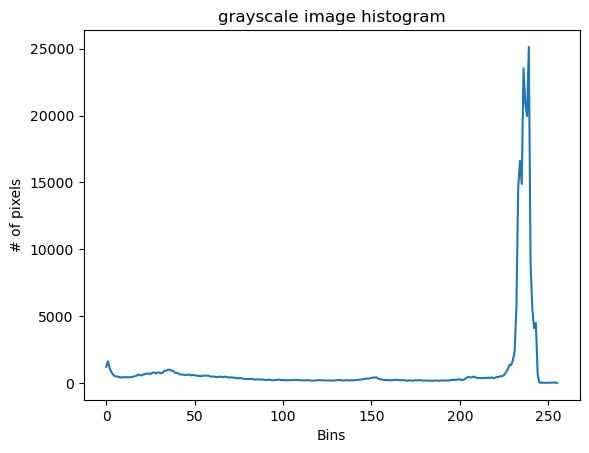

In [3]:
import matplotlib.pyplot as plt

img = cv.imread("images/camera.jpg")
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

hist = cv.calcHist([img_gray], [0], None, [256], [0, 256])

plt.figure()
plt.plot(hist)
plt.title('grayscale image histogram')
plt.xlabel("Bins")
plt.ylabel("# of pixels")
plt.show()

## Exercise
1. Draw histogram for each channel in an image array on the same plot.

**Histogram equalization**

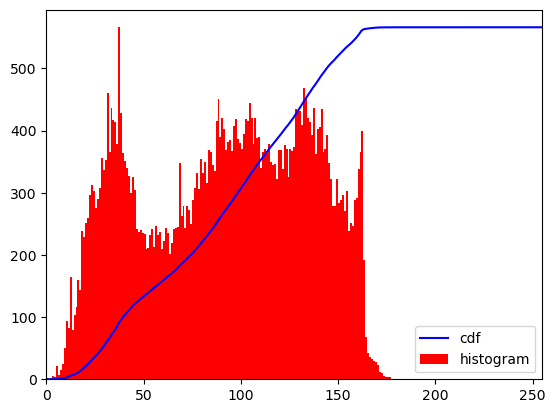

In [4]:
img = cv.imread('images/low_contrast_img.jfif', 0)
hist, bins = np.histogram(img.flatten(), 256, [0, 256])

cdf = hist.cumsum()
cdf_normalized = cdf*float(hist.max()) / cdf.max()

plt.plot(cdf_normalized, color='b')
plt.hist(img.flatten(), 256, [0, 256], color='r')
plt.xlim([0, 255])
plt.legend(('cdf', 'histogram'), loc='best')
plt.show()

In [5]:
dst = cv.equalizeHist(img)

display_images([img, dst], ("original", "histogram equalized"))

NameError: name 'display_images' is not defined

In [ ]:
hist, bins = np.histogram(dst.flatten(), 256, [0, 256])

cdf = hist.cumsum()
cdf_normalized = cdf*float(hist.max()) / cdf.max()

plt.plot(cdf_normalized, color='b')
plt.hist(dst.flatten(), 256, [0, 256], color='r')
plt.xlim([0, 255])
plt.legend(('cdf', 'histogram'), loc='best')
plt.show()

## Contrast limited adaptive histogram equalization (CLAHE)
In adaptive histogram equalization, image is divided into small blocks called "tiles" (tileSize is 8x8 by default in OpenCV). Then, each of these blocks are histogram equalized as usual. So in a small area, histogram would confine to a small region (unless there is noise). If noise is there, it will be amplified. To avoid this, contrast limiting is applied. If any histogram bin is above a specified contrast limit (by default 40 in OpenCV), those pixels are clipped and distributed uniformly to other bins before applying histogram equalization.

---

**Further reading**

Refer to this [MATLAB official documentation](https://www.mathworks.com/help/visionhdl/ug/contrast-adaptive-histogram-equalization.html) for the algorithm of CLAHE.

---

In [ ]:
from utils import display_images

gray = cv.imread("images/winter_low_contrast.jfif", 0)

eq = cv.equalizeHist(gray)
clahe = cv.createCLAHE(clipLimit=4, tileGridSize=(9, 9))
dst = clahe.apply(gray)

display_images([gray, eq, dst], ("grayscale", "equalized", "CLAHE"))

## Exercise
Try histogram equalization and CLAHE on 'winter.jfif' and display the results together with the original grayscale image. Comment on the results obtained.

# Annotating images using OpenCV
Why image annotations? Below are some of the use cases:
- Adding information to your images
- Drawing bounding boxes around objects

## Draw line on image
The associated function is `cv.line()`:
```
cv.line(img, pt1, pt2, color, thickness, lineType, shift)
```
1. First argument, img is the source image
2. pt1 is the first point of the line segment.
3. pt3 is the second point of the line segment.
4. thickness is like what the name suggests.
5. linetype is optional flags. Examples are:
    - cv.FILLED
    - cv.LINE_4
    - cv.LINE_8
    - cv.LINE_AA

In [6]:
img = cv.imread("images/meal.jpg")
img_copy = img.copy()
# img.shape  (614, 826)
start_point = (100, 150)
end_point = (100, 600)

cv.line(img_copy, start_point, end_point, (100, 150, 50), 2, cv.LINE_AA)

cv.imshow('line', img_copy)
cv.waitKey(0)
cv.destroyAllWindows()

## Draw rectangle
The function is `cv.rectangle()`.
```python
cv.rectangle(img, pt1, pt2, color, thickness, linetype, shift)
```
1. First argument, img is the source image.
2. pt1 is the vertex / corner of rectangle.
3. pt2 is the opposite vertex / corner of rectangle. Together, pt1 and pt2 form the diagonal of the rectangle.

In [7]:
img_copy = img.copy()
pts1 = (160, 250)
pts2 = (485, 475)

cv.rectangle(img_copy, pts1, pts2, (0, 0, 255), 3, cv.LINE_AA)

cv.imshow("rectangle", img_copy)
cv.waitKey(0)
cv.destroyAllWindows()

## Draw circle
The function is `cv.circle()`.
```python
cv.ellipse(img, center, radius, color, thickness, linetype)
```
1. First argument, img is the source image.
2. center is the center coordinates of ellipse.
3. radius must be an `int`.

In [8]:
img_copy = img.copy()
center = (310, 340)
radius = 100

cv.circle(img_copy, center, radius, (255, 0, 0), 2, cv.LINE_AA)

cv.imshow("rectangle", img_copy)
cv.waitKey(0)
cv.destroyAllWindows()

## Draw ellipse
The function is `cv.ellipse()`.
```python
cv.ellipse(img, center, axes, angle, startAngle, endAngle, color, ...)
```
1. First argument, img is the source image.
2. center is the center coordinates of ellipse.
3. axes is a tuple of half the axes (major & minor) lengths.
4. angle is the rotation angle. Both axes and angle arguments will determine if the output is a *horizontal* ellipse or a *vertical* ellipse.
5. If we want to draw full ellipse, then set `startAngle = 0` and `endAngle = 360`.

In [9]:
img_copy = img.copy()

center = (310, 340)
axes = (155, 95)

cv.ellipse(img_copy, center, axes, 0, 0, 360, (0, 255, 0), 2)
cv.imshow("ellipse", img_copy)
cv.waitKey(0)
cv.destroyAllWindows()

## Text on image
```
cv.putText()
```

In [10]:
img_copy = img.copy()

text = "The food is delicious!"
org = (25, 25)
cv.putText(img_copy, text, org, cv.FONT_HERSHEY_SIMPLEX, 0.7, (200, 100, 30), 2)
cv.imshow('text on image', img_copy)
cv.waitKey(0)
cv.destroyAllWindows()

## Exercise: Drawing functions
1. Draw a bulleye image like what shown below:  
![bulleye](img_embed/bulleye.PNG "bulleye")
2. Draw a finish line image as below:

![finish_line](img_embed/custom_draw.jpg)

# Affine transformation operations
Rotation and translation of images are among the most fundamental operations in image editing. Both fall under a broader class of *affine transformation*. Affine transformation is a linear mapping method that preserves points, straight lines and planes. Sets of parallel lines remain parallel after an affine transformation. Mathematically speaking, a transformation that can be expressed as the form of matrix multiplication (linear combination) followed by vector addition (translation).

$$A = \begin{bmatrix} a_{00} & a_{01} \\ a_{10} & a_{11} \end{bmatrix}, 
B = \begin{bmatrix} b_{0} \\ b_{1} \end{bmatrix} $$

$$ M = \begin{bmatrix} A & B \end{bmatrix} $$

$$ T = A . \begin{bmatrix} x \\ y \end{bmatrix} + B $$

$$ T = M . [x, y, 1]^T$$

$$ T = \begin{bmatrix} a_{00}x + a_{01}y + b_{0} \\ a_{10}x + a_{11}y + b_{1} \end{bmatrix}$$

The affine transformation is typically used to correct for geometric distortions or deformations caused by non-ideal camera angles.

## Rotation 
Two key functions:
- `cv.getRotationMatrix2D(center, angle, scale)`
    1. First argument is the center of rotation (coordinates, which is expressed as tuple).
    2. Second argument is angle of rotation in degrees.
    3. scale: scale factor which scales the image up or down.
- `cv.warpAffine(src, M, dsize, ...)`
    1. First argument is the source image.
    2. M is the transformation matrix (output of the `cv.getRotationMatrix2D()` function. 
    3. dsize is size of output image. 
... denotes optional arguments. For the complete list of arguments, visit the online [OpenCV documentation](https://docs.opencv.org/4.x/da/d54/group__imgproc__transform.html#ga0203d9ee5fcd28d40dbc4a1ea4451983)

## Translation
- Create transformation matrix, $M$ which is a 2x3 array.
- Call `cv.warpAffine()` function.

In [11]:
# rotation
img = cv.imread('images/lena.jfif')
rows, cols = img.shape[:2]
M = cv.getRotationMatrix2D((cols // 2, rows // 2), 90, 1)
dst = cv.warpAffine(img, M, (cols, rows))

cv.imshow('rotated image', dst)
cv.waitKey(0)
cv.destroyAllWindows()

AttributeError: 'NoneType' object has no attribute 'shape'

In [ ]:
# translation
M = np.float32([[1, 0, 100], [0, 1, 50]])
dst = cv.warpAffine(img, M, (cols, rows))

cv.imshow('translated image', dst)
cv.waitKey(0)
cv.destroyAllWindows()

## OpenCV affine transformation function
In affine transformation, all parallel lines in the original image will still be parallel in the output image. To find the transformation matrix, we need 3 points from the input image and their corresponding locations in the output image. When it comes to the implementation part, similar to rotation, two OpenCV functions are needed: `cv.getAffineTransform()` to get the $2 \times 3$ matrix, in which this matrix will be argument for `cv.warpAffine()`.
```python
# Calculates affine transform from 3 pairs of the corresponding points
cv.getAffineTransform(src, dst)
```
1. First argument is coordinates of triangle vertices in the source image.
2. Coordinates of the corresponding triangle vertices in the destination image.

```python
cv.warpAffine(src, M, dsize, ...)
```
1. First argument, src is the input image.
2. M is the $2 \times 3$ transformation matrix.
3. dsize is the size of the output image. Usually, same as the input image size.

In [ ]:
import matplotlib.pyplot as plt

img = cv.imread('images/chessboard.png')

# change to RGB
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# custom affine transform
rows, cols = img.shape[:2]

pts1 = np.float32([[25, 25], [100, 25], [25, 100]])
pts2 = np.float32([[75, 75], [150, 85], [85, 150]])

for pt in pts1:
    cv.circle(img, (int(pt[0]), int(pt[1])), 1, (0, 100, 200), -1)

M = cv.getAffineTransform(pts1, pts2)
dst = cv.warpAffine(img, M, (cols, rows))

for pt in pts2:
    cv.circle(dst, (int(pt[0]), int(pt[1])), 1, (0, 0, 255), -1)

plt.subplot(121), plt.imshow(img), plt.title('input'), plt.axis("off")
plt.subplot(122), plt.imshow(dst), plt.title('output'), plt.axis('off')
plt.show()

## Perspective transform
<figure>
<img src="img_embed/road.jpg" style="width:50%">
<figcaption align = "center"> Figure 1: Road warped by perspective projection. </figcaption>
</figure>

<figure>
<img src="img_embed/billboard.jpg" style="width:50%">
<figcaption align = "center"> Figure 2: Billboard warped by perspective projection. </figcaption>
</figure>

The above figures show examples of perspective projection, which results in segments close to the camera appear longer than segments of identical length that are further away from the camera (Figure 2). In addition, parallel lines may appear to converge towards a vanishing point. 

Perspective transform can be an issue if we want to check if the object of interest have the right shape and size. So, this beg a question: can we "reverse" the perspective distortion? The answer is yes given that we know distinct feature of the object (normally corners).

OpenCV does provide 2 functions to perform perspective transformation:
- `cv.getPerspectiveTransform(src, dst, solveMethod)`
    * src and dst are coordinates of quadrangle vertices for source and target images respectively.
    * methods (optional) to solve the linear equations. Refer to this [link](https://docs.opencv.org/4.5.5/d2/de8/group__core__array.html#gaaf9ea5dcc392d5ae04eacb9920b9674c) for more info.
    * The output is the transformation matrix, $M$.
- `cv.warpPerspective(src, M, dsize)` returns the warped image.
    * src: input image
    * M: $3 \times 3$ transformation matrix
    * dsize: size of output image
    
To learn more about image geometric transformation, you can refer to book: **Multiple View Geometry in Computer Vision** by Richard Hartley and Andrew Zisserman.

### Exercise
Use the image "dice.jfif".

![dice](img_embed/dice_marked.jpg "dice")

Obtain the bird eye view of the region outlined in red with perspective transform.

# More image augmentation techniques
* Flipping an image
* Random cropping
* Color jittering
* Adding noise

## Flipping an image

In [ ]:
from utils import display_images

img = cv.imread("images/meal.jpg")
img_ud = cv.flip(img, 0)  # around x-axis
img_lr = cv.flip(img, 1)
img_lrud = cv.flip(img, -1)

display_images([img, img_lr, img_ud, img_lrud], 
              ("original", "left right", "up-down", "both"))

## Random cropping

In [ ]:
import os
import random

def randomcrop(img, scale=0.5, seed=None):
    """Randomly crop image. The recommended scale is [0.5, 0.95]
    Argument: 
    ---
    img: source image (uint8 array)
    scale: fraction [0.5-0.95]
    seed: random generator seed
    
    Return:
    ---
    Cropped image"""
    if seed is not None:
        random.seed(seed)
    height, width = int(img.shape[0] * scale), int(img.shape[1] * scale)
    x = random.randint(0, img.shape[1] - int(width))
    y = random.randint(0, img.shape[0] - int(height))
    cropped = img[y: y+height, x: x+width]
    resized = cv.resize(cropped, (img.shape[1], img.shape[0]))
    return resized

## Color jittering

In [ ]:
def colorjitter(img, cj_type="b", seed=None):
    """Color jitter function
    Argument:
    ---
    img: BGR source image (uint8)
    cj_type: 
    - b: brightness
    - s: saturation
    - c: contrast
    - h: hue
    seed: random generator seed

    Return:
    ---
    resulting image (uint8)
    """
    if seed is not None:
        random.seed(seed)
        
    if cj_type == "b":
        value = random.randint(-60, 60)
        while value == 0:
            value = random.randint(-60, 60)

        hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)
        h, s, v = cv.split(hsv)
        # cast to float
        v_channel = np.float32(v) + value
        v_channel = np.clip(v_channel, 0, 255).astype("uint8")
        final_hsv = cv.merge((h, s, v_channel))
        img = cv.cvtColor(final_hsv, cv.COLOR_HSV2BGR)
        return img

    if cj_type == "s":
        value = random.randint(-60, 60)
        while value == 0:
            value = random.randint(-60, 60)

        hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)
        h, s, v = cv.split(hsv)
        # cast to float
        s_channel = np.float32(s) + value
        s_channel = np.clip(s_channel, 0, 255).astype("uint8")
        final_hsv = cv.merge((h, s_channel, v))
        img = cv.cvtColor(final_hsv, cv.COLOR_HSV2BGR)
        return img

    if cj_type == "c":
        # multiplier coefficient randomly generated centered around mean of 1
        coef = random.gauss(1, 0.3)
        img_float = np.float32(img) * coef
        img_final = np.clip(img_float, 0, 255).astype("uint8")
        return img_final

    if cj_type == "h":
        value = random.randint(-30, 30)
        while value == 0:
            value = random.randint(-30, 30)

        hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)
        h, s, v = cv.split(hsv)
        # cast to float
        h_channel = np.float32(h) + value
        h_channel = np.clip(h_channel, 0, 179).astype("uint8")
        final_hsv = cv.merge((h_channel, s, v))
        img = cv.cvtColor(final_hsv, cv.COLOR_HSV2BGR)
        return img

## Noise injection

In [20]:
def add_noise(img, mean=0, sigma=30, seed=None):
    """Add Gaussian noise to image.
    Argument:
    ---
    img: source image (uint8)
    mean, sigma: parameters of Gaussian pdf, with default of 0 and 30 respectively
    seed: random number generator seed
    
    Return:
    ---
    resulting image with noise (uint8)"""
    img = img.astype("float32")

    height, width, channels = img.shape
    if seed is not None:
        rng = np.random.default_rng(seed)
    else:
        rng = np.random.default_rng(seed)
    noise = rng.normal(loc=mean, scale=sigma, size=(height, width, channels))

    img_noise = img + noise
    img_noise = np.clip(img_noise, 0, 255).astype("uint8")
    return img_noise

# Bitwise operations
In this section, we will review four bitwise operations: *AND, OR, XOR* and *NOT*. While very basic and low level, these 4 operations are indispensible, when it comes to **masking**, **extracting specific region of an image** and **pixel-level manipulation**. 

Bitwise operations function in a binary manner. A given pixel is turned off if it has a value of zero and it is turned on if the pixel has a value greater than zero.
```python
dst = cv.bitwise_and(src1, src2[, dst[, mask]])
```
The first and second arguments are input array (images). Argument 'mask' is optional operation mask. `cv.bitwise_or` and `cv.bitwise_xor` method signature are similar to `cv.bitwise_and`.

```python
dst = cv.bitwise_not(src[, dst[, mask]])
```
The first argument is the input array, while argument 'mask' is optional operation mask.

In [21]:
from utils import display_images, display_image

rect = np.zeros((400, 400), dtype=np.uint8)
cv.rectangle(rect, (30, 30), (370, 370), 255, -1)

circle = np.zeros((400, 400), dtype=np.uint8)
cv.circle(circle, (200, 200), 200, 255, -1)
display_images([rect, circle], ("rectangle", "circle"))

In [22]:
# AND operation
res_AND = cv.bitwise_and(rect, circle)
display_image('AND operator result', res_AND)

In [23]:
# OR operation
res_OR = cv.bitwise_or(rect, circle)
display_image("OR operator result", res_OR)

In [24]:
# XOR operation
res_XOR = cv.bitwise_xor(rect, circle)
display_image('XOR operator result', res_XOR)

**Exercise**  
Turn the white rectangle on dark background to black rectangle on white background.

# Weekly activity
1. Rotate image by 45 degrees without cropping the sides of the image. (Hint: There are 2 strategies to tackle these problems). Use _"lena.jfif"_ as the input image.
    - Use external libraries `imutils`.  
    - Modify the transformation matrix.
2. Use the images with titles: _"flower.jfif"_ and _"native-bee.png"_. I want to put flower above an image. If I add two images, it will change color. If I blend it, I get a transparent effect. But I want it to be opaque. If it was a rectangular region, we could use the ROI as we did in the previous section. But flower is not a rectangular region. This is where bitwise operations, like AND, OR, NOT and XOR really come in handy. The associated functions are `cv.bitwise_and()`, `cv.bitwise_or()` and `cv.bitwise_not()`. You need to use `cv.threshold` function to segment the flower. Please refer to [online documentation](https://docs.opencv.org/4.x/d0/d86/tutorial_py_image_arithmetics.html) for more info. The result should resemble the following:  
![bee and flowers](img_embed/activity3.PNG "bee_flower")
3. Write a function that randomly crop the central region of an image. The method signature should be as shown in the following:
```
random_center_crop(image, min_crop_ratio, max_crop_ratio)
```

4. Aside from Gaussian noise, name another common type of noise. Write the code to demonstrate how the noise can be included in an image.

In [23]:
#Question1
#First way
import numpy as np
import cv2 as cv
!pip install imutils

from imutils import rotate_bound
img = cv.imread('images/native-bee.png')
rotated = rotate_bound(img, -45)

cv.imshow('rotate', rotated)
cv.waitKey(0)
cv.destroyAllWindows()

In [25]:
image = cv2.imread('images/native-bee.png')
if image is None:
    raise FileNotFoundError("The image file 'lena.jfif' was not found.")
(h, w) = image.shape[:2]
(cX, cY) = (w // 2, h // 2)

# Compute the rotation matrix
M = cv2.getRotationMatrix2D((cX, cY), 45, 1.0)

# Compute the new bounding dimensions of the image
cos = np.abs(M[0, 0])
sin = np.abs(M[0, 1])
nW = int((h * sin) + (w * cos))
nH = int((h * cos) + (w * sin))

# Adjust the rotation matrix to account for translation
M[0, 2] += (nW / 2) - cX
M[1, 2] += (nH / 2) - cY

# Perform the actual rotation and return the image
rotated = cv2.warpAffine(image, M, (nW, nH))

# Save or display the rotated image
cv2.imshow("Rotated Image", rotated)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [28]:
##Question 2
# Load the images
flower = cv2.imread('images/flower.jfif')
bee = cv2.imread('images/native-bee.png')

# Add flower on the top left hand corner of the bee image
rows, cols = flower.shape[:2]
roi = bee[:rows, :cols]

# roi is the background; now we need to get the flower
# Lets use image thresholding
flower_gray = cv.cvtColor(flower, cv.COLOR_BGR2GRAY)
ret, mask = cv.threshold(flower_gray, 70, 255, cv.THRESH_BINARY)
mask_inv = cv.bitwise_not(mask)

# get the background (from img1) and foreground (flower from img2)
bee_bg = cv.bitwise_and(roi, roi, mask=mask_inv)
flower_fg = cv.bitwise_and(flower, flower, mask=mask)

res = cv.add(bee_bg, flower_fg)
bee[:rows, :cols] = res

cv.imshow("flower_bee", bee)
cv.waitKey(0)
cv.destroyAllWindows()

In [29]:
#Question 3
import random

def random_center_crop(image, min_crop_ratio, max_crop_ratio):
    h, w = image.shape[:2]
    crop_ratio = random.uniform(min_crop_ratio, max_crop_ratio)
    crop_h = int(h * crop_ratio)
    crop_w = int(w * crop_ratio)
    
    start_y = (h - crop_h) // 2
    start_x = (w - crop_w) // 2
    
    cropped_image = image[start_y:start_y + crop_h, start_x:start_x + crop_w]
    
    return cropped_image

In [31]:
##Question 4
def salt_and_pepper_noise(image, salt_prob, pepper_prob):
    noisy_image = image.copy()
    num_salt = np.ceil(salt_prob * image.size)
    num_pepper = np.ceil(pepper_prob * image.size)
    
    # Add salt noise (white pixels)
    coords = [np.random.randint(0, i - 1, int(num_salt)) for i in image.shape]
    noisy_image[coords[0], coords[1], :] = 1
    
    # Add pepper noise (black pixels)
    coords = [np.random.randint(0, i - 1, int(num_pepper)) for i in image.shape]
    noisy_image[coords[0], coords[1], :] = 0
    
    return noisy_image